# Telco Customer Churn

### About Dataset

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

## Data Loading & Cleaning

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce")

In [7]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [8]:
data=data.dropna()

## Data Visualization

### 1. Churn Count

C:\Users\mizom\AppData\Local\Temp\ipykernel_23228\1910045276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='Set2')


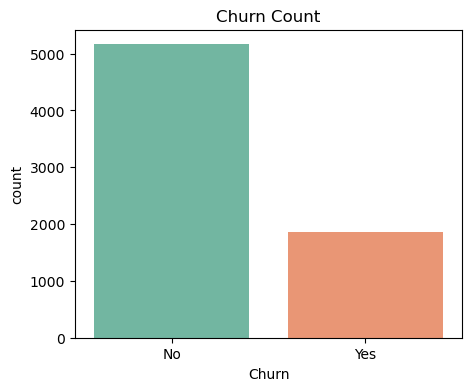

In [9]:

plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Churn Count')
plt.show()


### 2. Gender vs Churn

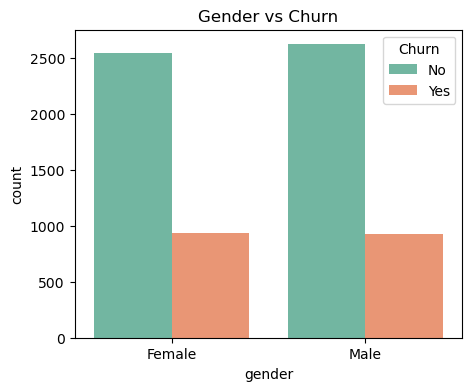

In [10]:

plt.figure(figsize=(5,4))
sns.countplot(data=data, x='gender', hue='Churn', palette='Set2')
plt.title('Gender vs Churn')
plt.show()


### 3. Contract Type vs Churn

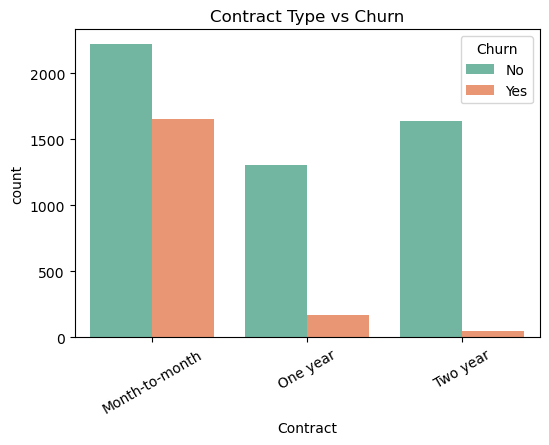

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Contract', hue='Churn', palette='Set2')
plt.title('Contract Type vs Churn')
plt.xticks(rotation=30)
plt.show()


### 4. Monthly Charges Distribution

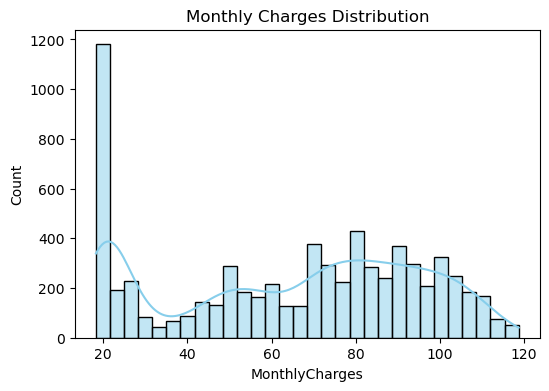

In [12]:

plt.figure(figsize=(6,4))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Monthly Charges Distribution')
plt.show()


### 5. Tenure Distribution

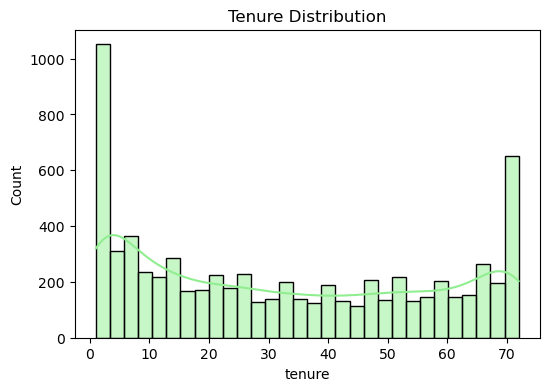

In [13]:

plt.figure(figsize=(6,4))
sns.histplot(data['tenure'], bins=30, kde=True, color='lightgreen')
plt.title('Tenure Distribution')
plt.show()


## Data Preprocessing

In [14]:
data_LG=data
data_LG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [15]:
scaler=StandardScaler()
data_LG[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(data_LG[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])
data_LG.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-0.440327,Yes,No,-1.280248,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,5575-GNVDE,Male,-0.440327,No,No,0.064303,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,3668-QPYBK,Male,-0.440327,No,No,-1.239504,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,7795-CFOCW,Male,-0.440327,No,No,0.512486,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,9237-HQITU,Female,-0.440327,No,No,-1.239504,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes


In [16]:
label = LabelEncoder()
for col in ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']:
    data_LG[col] = label.fit_transform(data_LG[col])


In [17]:
cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
data_LG = pd.get_dummies(data_LG, columns=cols)


In [18]:
data_LG=data_LG.drop(columns=['customerID'])

In [19]:
data_LG.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,True,False,False,True,False,False,False,False,True,False
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,True,False,False,False,True,False,False,False,False,True
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,True,False,False,True,False,False,False,False,False,True
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,True,False,True,False,False,False
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,True,False,False,True,False,False,False,False,True,False


## Training Logistic Regression Model

In [20]:
X=data_LG.drop(columns='Churn')
y=data_LG['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,False,...,True,False,False,True,False,False,False,False,True,False
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,True,...,True,False,False,False,True,False,False,False,False,True
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,True,...,True,False,False,True,False,False,False,False,False,True
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,False,...,True,False,False,False,True,False,True,False,False,False
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,True,...,True,False,False,True,False,False,False,False,True,False


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [22]:
LG=LogisticRegression()

In [23]:
rfe = RFE(estimator=LG, n_features_to_select=22)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=22)

In [24]:
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


In [25]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
LG.fit(X_train_rfe, y_train)


LogisticRegression()

In [26]:
y_pred=LG.predict(X_test_rfe)

### Model Evaluation

In [27]:
print('Accuracy:')
print(accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:
0.8041237113402062

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2079
           1       0.65      0.54      0.59       734

    accuracy                           0.80      2813
   macro avg       0.75      0.72      0.73      2813
weighted avg       0.80      0.80      0.80      2813



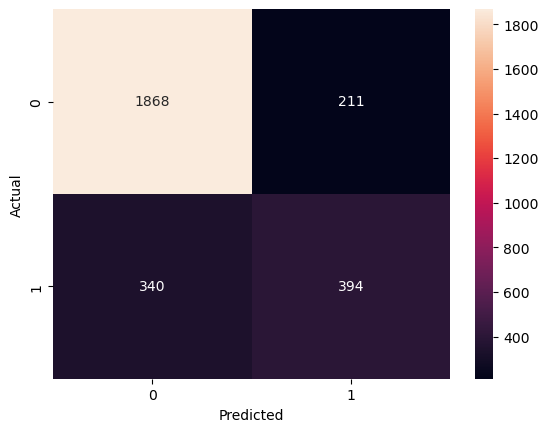

In [28]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Training Random Forest Model

In [29]:
data_RF=data
data_RF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [30]:
label_RF = LabelEncoder()
for col in ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']:
    data_RF[col] = label.fit_transform(data_RF[col])

In [31]:
cols_RF = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
data_RF = pd.get_dummies(data_RF, columns=cols)


In [32]:
data_RF=data_RF.drop(columns=['customerID'])

In [33]:
data_RF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,True,False,False,True,False,False,False,False,True,False
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,True,False,False,False,True,False,False,False,False,True
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,True,False,False,True,False,False,False,False,False,True
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,True,False,True,False,False,False
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,True,False,False,True,False,False,False,False,True,False


In [34]:
X_RF=data_RF.drop(columns='Churn')
y_RF=data_RF['Churn']
X_RF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,False,...,True,False,False,True,False,False,False,False,True,False
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,True,...,True,False,False,False,True,False,False,False,False,True
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,True,...,True,False,False,True,False,False,False,False,False,True
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,False,...,True,False,False,False,True,False,True,False,False,False
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,True,...,True,False,False,True,False,False,False,False,True,False


In [35]:
X_train_RF,X_test_RF,y_train_RF,y_test_RF=train_test_split(X_RF,y_RF,test_size=0.4,random_state=42)

In [36]:
RF=RandomForestClassifier()

In [37]:
X_train_RF.info()
X_train_RF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4219 entries, 1481 to 862
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   4219 non-null   int64  
 1   SeniorCitizen                            4219 non-null   float64
 2   Partner                                  4219 non-null   int64  
 3   Dependents                               4219 non-null   int64  
 4   tenure                                   4219 non-null   float64
 5   PhoneService                             4219 non-null   int64  
 6   PaperlessBilling                         4219 non-null   int64  
 7   MonthlyCharges                           4219 non-null   float64
 8   TotalCharges                             4219 non-null   float64
 9   MultipleLines_No                         4219 non-null   bool   
 10  MultipleLines_No phone service           4219 non-n

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1481,1,-0.440327,1,1,1.612573,0,1,0.010032,1.090174,False,...,False,False,True,False,False,True,False,True,False,False
2245,0,-0.440327,1,0,1.490341,1,0,1.347960,2.187120,False,...,False,False,True,False,False,True,True,False,False,False
6325,0,-0.440327,1,1,-0.628345,1,0,0.899214,-0.312736,True,...,True,False,False,True,False,False,False,False,True,False
6335,0,-0.440327,0,0,-0.750577,1,1,0.161276,-0.600853,True,...,False,False,True,True,False,False,False,False,True,False
5874,0,-0.440327,0,0,-0.913552,1,1,1.190067,-0.539617,False,...,False,False,True,True,False,False,False,False,True,False


In [38]:
RF.fit(X_train_RF, y_train_RF)

RandomForestClassifier()

In [39]:
y_pred_RF=RF.predict(X_test_RF)

### Model Evaluation

In [40]:
print('Accuracy:')
print(accuracy_score(y_test_RF,y_pred_RF))
print("\nClassification Report:")
print(classification_report(y_test_RF, y_pred_RF))

Accuracy:
0.7927479559189478

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2079
           1       0.63      0.51      0.56       734

    accuracy                           0.79      2813
   macro avg       0.73      0.70      0.71      2813
weighted avg       0.78      0.79      0.79      2813



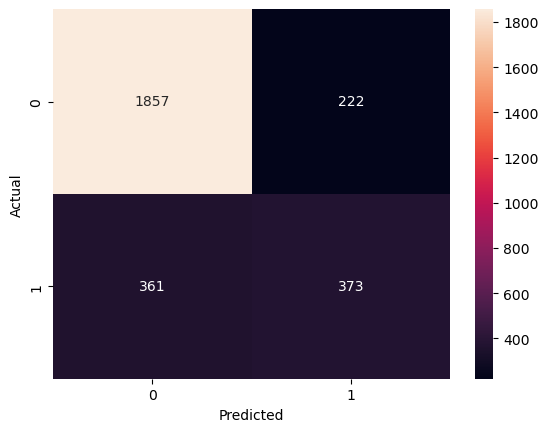

In [41]:
cm=confusion_matrix(y_test_RF,y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Saving The Model

In [42]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(RF, f)

try:
    with open("encoders.pkl", "wb") as f:
        pickle.dump(label_RF, f)
except NameError:
    print("No encoders found — skipping.")

with open("columns.pkl", "wb") as f:
    pickle.dump(list(X_RF.columns), f)

print("Model, scaler, encoders, and columns saved successfully!")


Model, scaler, encoders, and columns saved successfully!
